In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
%matplotlib inline

# Estructura

## Figura

In [4]:
fig = plt.figure(figsize=(1,1))

plt.show()

<Figure size 100x100 with 0 Axes>

## Axes

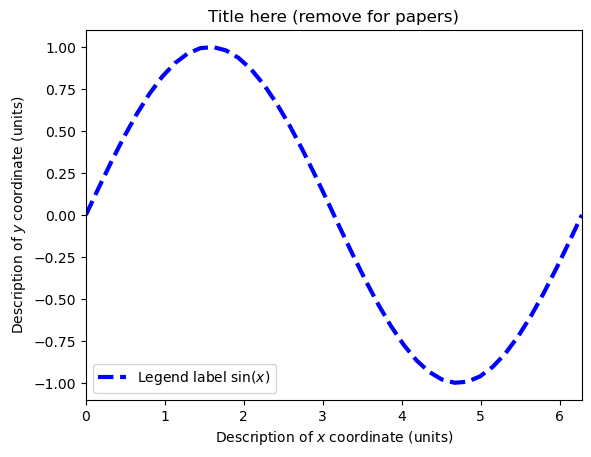

In [6]:
# Silly example data
bp_x = np.linspace(0, 2*np.pi, num=40, endpoint=True)
bp_y = np.sin(bp_x)

# Make the plot
plt.plot(bp_x, bp_y, linewidth=3, linestyle="--",
         color="blue", label=r"Legend label $\sin(x)$")
plt.xlabel(r"Description of $x$ coordinate (units)")
plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"Title here (remove for papers)")
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)
plt.legend(loc="lower left")
plt.show()

# construyendo una figura

In [5]:
x = list(range(10))
y = x

In [14]:
def grafica_linea(x,y):
    fig = plt.figure(figsize=(10,6))
    plt.plot(x,y
            ,label='Línea azul')
    plt.title('Una linea')
    plt.xlabel('Eje x')
    plt.ylabel('Eje y')
    plt.legend()
    plt.savefig('figura.png')

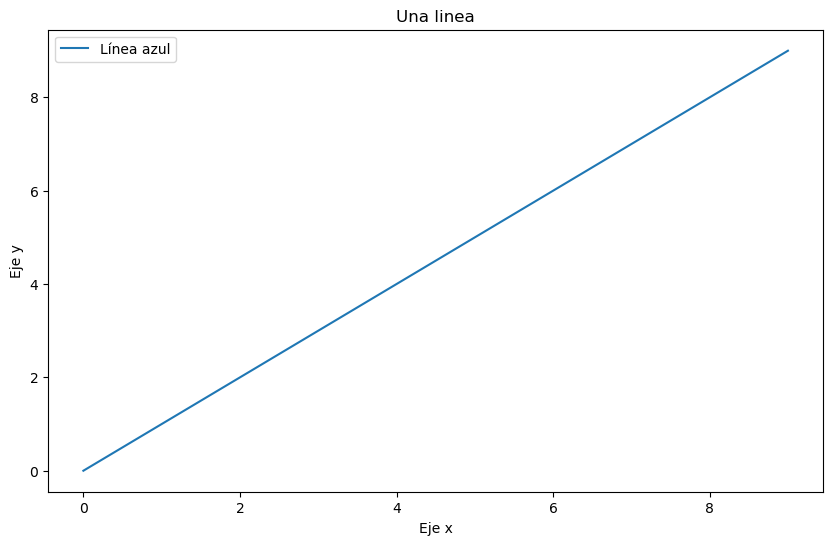

In [15]:
grafica_linea(x,y)

# Tipos de figuras visualización

## Line plot

In [20]:
df = pd.read_csv('./datos_falsos-220423-220907.csv', index_col=0)

In [22]:
df.head()

,first_name,last_name,email,gender,ip_address,date,salary
id,,,,,,,
1,Hinda,Morican,hmorican0@blinklist.com,Bigender,140.102.89.203,09/11/2021,1323
2,Marwin,McMakin,mmcmakin1@nydailynews.com,Male,102.95.205.140,26/08/2021,1395
3,Orson,Endrici,oendrici2@slate.com,Male,203.115.109.211,30/05/2021,1393
4,Sauncho,Loughman,sloughman3@soundcloud.com,Genderqueer,243.214.38.13,20/03/2021,1472
5,Darsey,Thursby,dthursby4@w3.org,Male,241.181.212.135,03/01/2021,1291


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 337 to 658
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   first_name  1000 non-null   object        
 1   last_name   1000 non-null   object        
 2   email       1000 non-null   object        
 3   gender      1000 non-null   object        
 4   ip_address  1000 non-null   object        
 5   date        1000 non-null   datetime64[ns]
 6   salary      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 62.5+ KB


In [36]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date',inplace=True)

In [42]:
x = df['date']
y = df['salary']

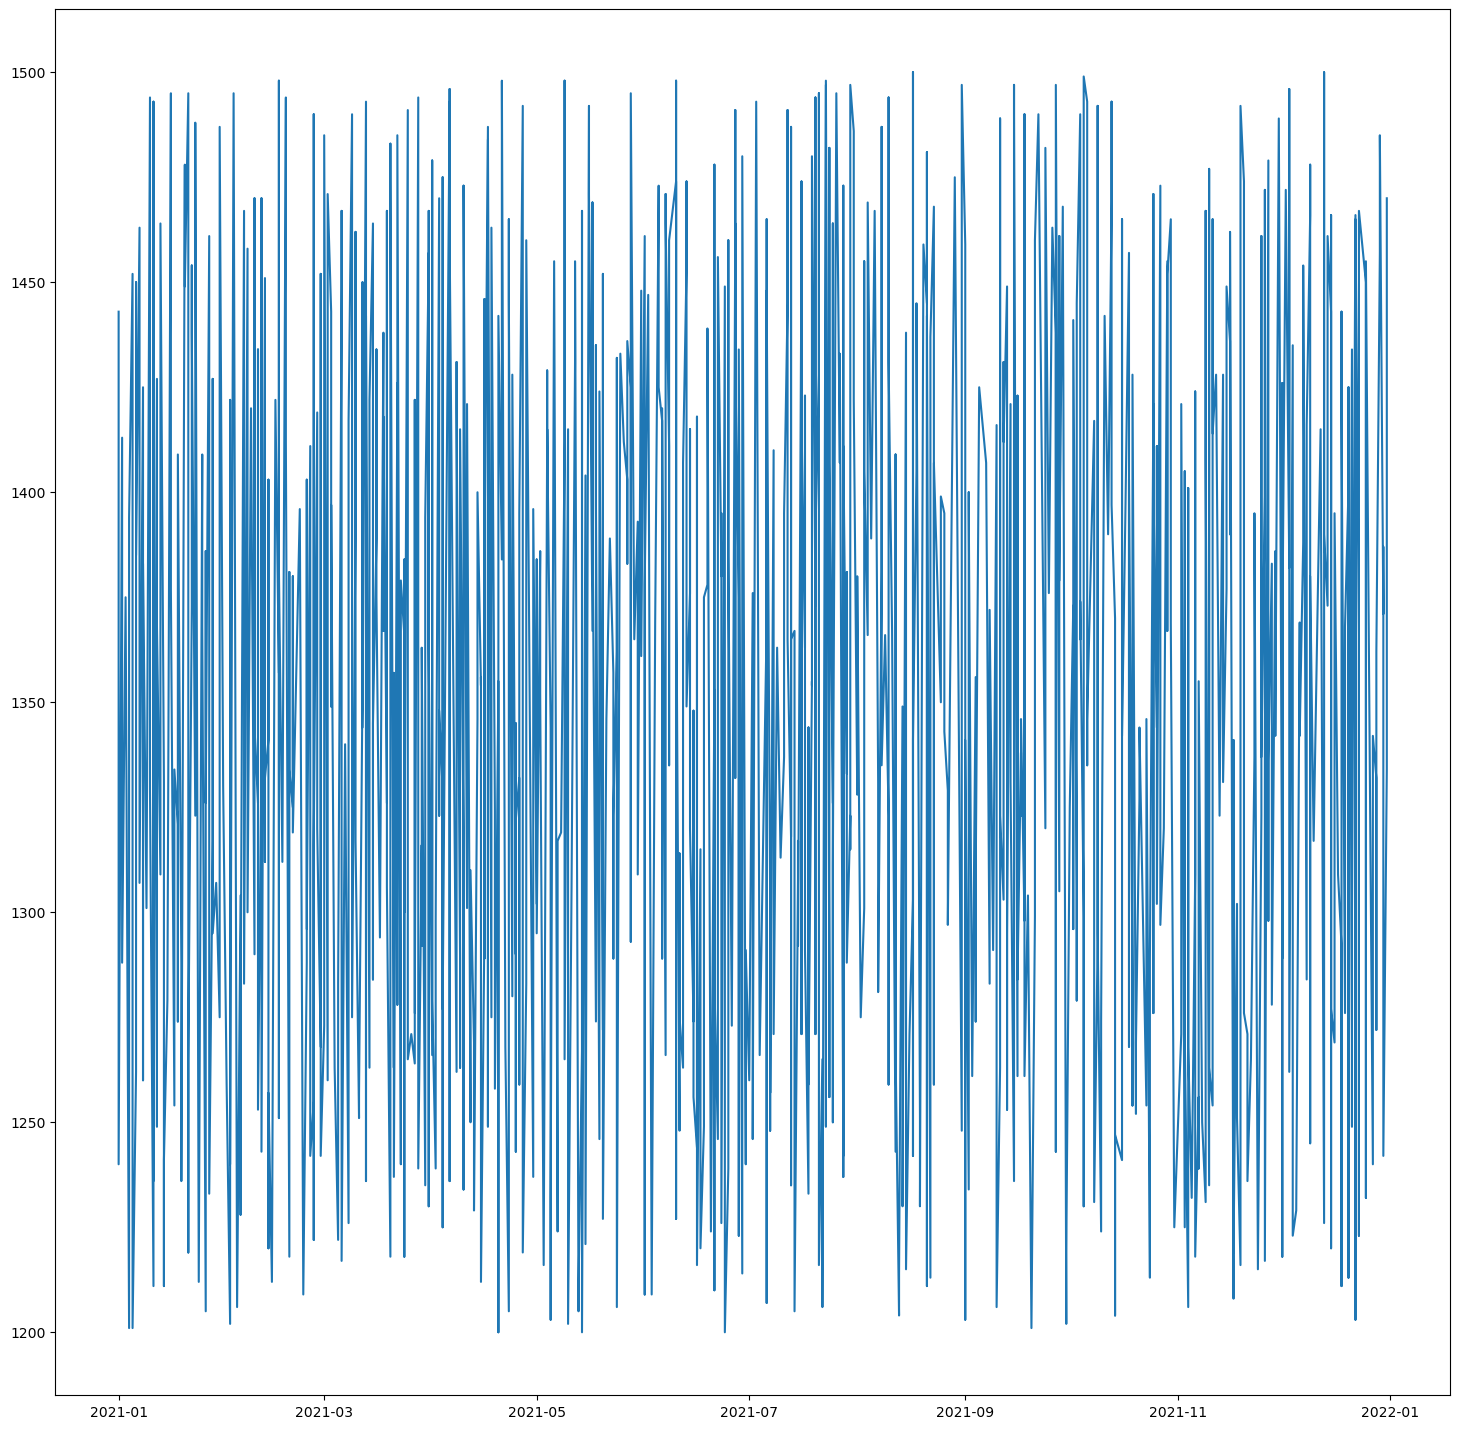

In [43]:
fig = plt.figure(figsize=(18,18))
plt.plot(x,y)
plt.show()

In [48]:
# definir fechas como indices
nuevo_df = df.set_index('date')

# Agrupar por inicio de mes y calcular media
datos = nuevo_df.groupby(pd.Grouper(freq='MS')).agg(['mean'])
datos


/var/folders/zc/ry4mrzj90hl8qhxlk6pk0sr40000gn/T/ipykernel_84674/2147730310.py:5: FutureWarning: ['first_name', 'last_name', 'email', 'gender', 'ip_address'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  datos = nuevo_df.groupby(pd.Grouper(freq='MS')).agg(['mean'])


,salary
,mean
date,
2021-01-01,1348.307692
2021-02-01,1337.900000
2021-03-01,1354.600000
2021-04-01,1353.579545
2021-05-01,1353.075000
2021-06-01,1346.947368
2021-07-01,1357.883929
2021-08-01,1353.970588


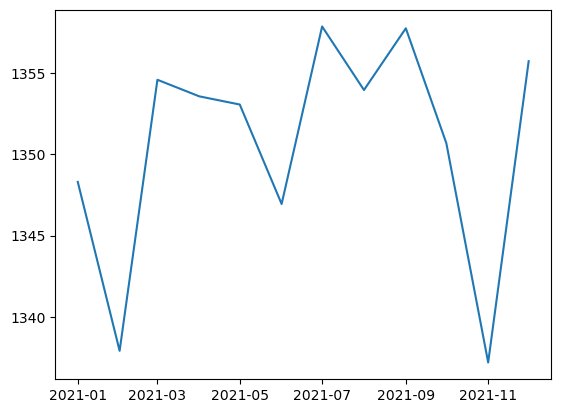

In [49]:
plt.plot(datos)

# gráficos de barras

In [50]:
df.head()

,first_name,last_name,email,gender,ip_address,date,salary
id,,,,,,,
337,Robin,Robillart,rrobillart9c@g.co,Agender,140.135.0.1,2021-01-01,1443
311,Sauveur,MacGibbon,smacgibbon8m@nih.gov,Bigender,69.65.66.196,2021-01-01,1269
828,Kennan,Geary,kgearymz@yandex.ru,Genderqueer,105.151.88.163,2021-01-01,1240
911,Erastus,Jotcham,ejotchampa@independent.co.uk,Agender,235.191.191.127,2021-01-02,1413
344,Lee,Hammond,lhammond9j@salon.com,Genderqueer,151.210.45.33,2021-01-02,1288


In [51]:
df['gender'].unique()

array(['Agender', 'Bigender', 'Genderqueer', 'Male', 'Genderfluid',
       'Non-binary', 'Female', 'Polygender'], dtype=object)

In [54]:
df.value_counts('gender')

gender
Agender        137
Female         134
Polygender     130
Genderfluid    125
Male           123
Non-binary     123
Genderqueer    118
Bigender       110
dtype: int64

In [55]:
x = df.value_counts('gender').index
y = df.value_counts('gender')

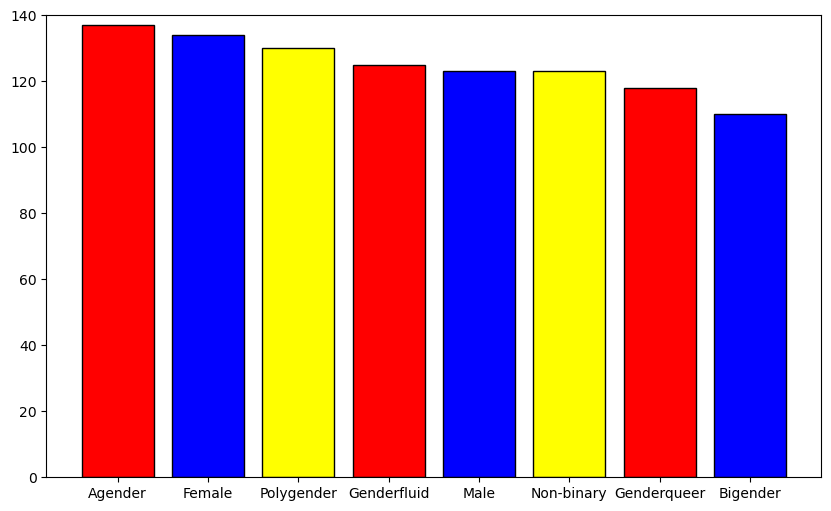

In [69]:
fig = plt.figure(figsize=(10,6))
colors = ['red','blue', 'yellow']
plt.bar(x,y, width=0.8, edgecolor='black', color=colors)
plt.ylim(0,140)
plt.show()

## Historigamas

In [72]:
from scipy.stats import skewnorm

In [75]:
data = skewnorm.rvs(10,size=1000)
data

array([ 1.10552431e-01,  5.19393742e-01,  6.18028693e-01,  1.64230517e+00,
       -1.10815758e-01,  4.21571264e-03,  4.83996920e-01,  7.62528467e-02,
        6.25292807e-01,  1.26362433e+00, -5.19048585e-02,  1.53653681e+00,
        3.38998324e-01,  9.31175024e-01,  1.35972342e+00,  6.28223202e-01,
        1.30355220e-01,  8.80543132e-01,  1.70920826e-01,  1.01299064e-01,
        6.54918574e-01,  4.92982204e-01,  2.67557407e-02,  6.86420184e-01,
        7.98167686e-01,  6.58217411e-01,  3.98186965e-01,  4.72952634e-01,
        2.43733215e-01,  3.14832180e-01,  1.39275559e+00,  2.10734431e-01,
        1.38252899e+00,  4.28710033e-01,  5.87299803e-01,  6.34485711e-01,
        5.58734928e-01,  9.30010950e-01,  3.54822039e-01,  8.10007255e-01,
       -3.72440456e-03,  2.32123874e+00,  6.78857626e-01,  1.92473958e+00,
        1.32387980e+00,  8.92683202e-01,  1.27840944e+00,  1.27266592e+00,
        4.00742731e-01,  1.07169217e+00,  1.93218091e+00,  7.80717841e-01,
        5.35376023e-01,  

In [84]:
data = data +1
data = data * 2000

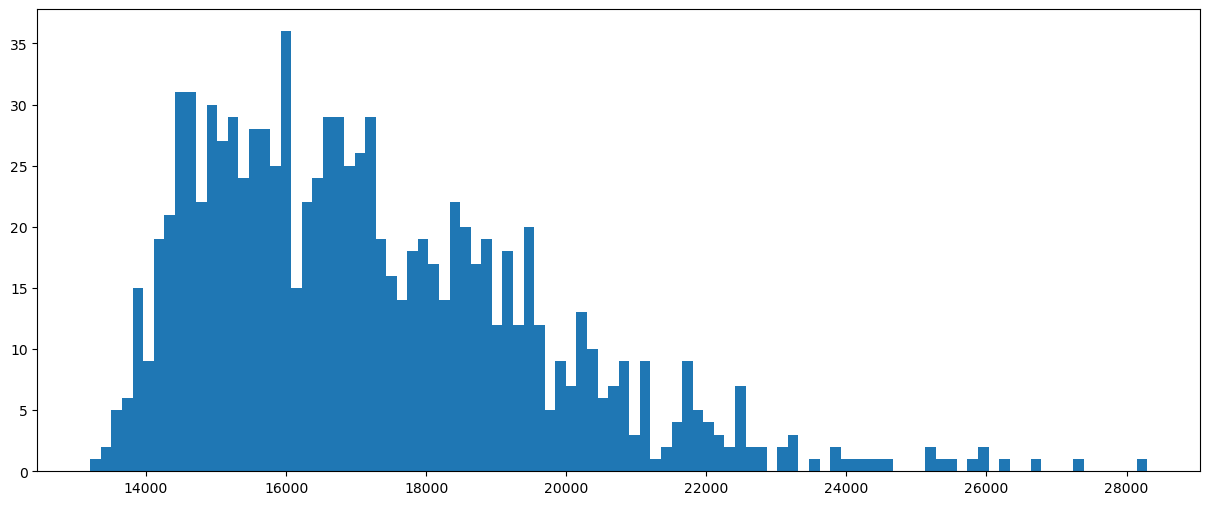

In [85]:
fig = plt.figure(figsize=(15,6))
plt.hist(data, bins=100)
plt.show()

## scartter

In [91]:
df = pd.read_csv('../data/alturapeso-220420-194738.csv')
df.columns = ['Genero','Altura', 'Peso']

In [92]:
df.head()

,Genero,Altura,Peso
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [93]:
metros = 0.0254
kilos = 0.453592

In [94]:
df['Altura'] = df['Altura'] * metros
df['Peso'] = df['Peso'] * kilos

In [98]:
df.head()

,Genero,Altura,Peso
0,Male,1.875714,109.720985
1,Male,1.747060,73.622732
2,Male,1.882397,96.497550
3,Male,1.821967,99.809504
4,Male,1.774998,93.598619


In [99]:
df['Genero'].unique()

array(['Male', 'Female'], dtype=object)

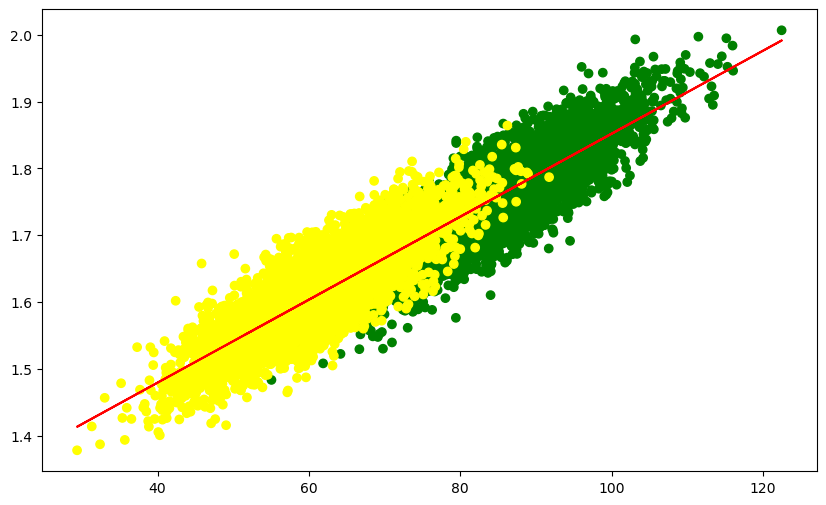

In [104]:
fig = plt.figure(figsize=(10,6))

y = df['Altura']
x = df['Peso']

colors = {'Male': 'green', 'Female':'yellow'}

m, b = np.polyfit(x,y,1)
plt.scatter(x,y, c= df['Genero'].map(colors))
plt.plot(x,m*x+b, c='red')

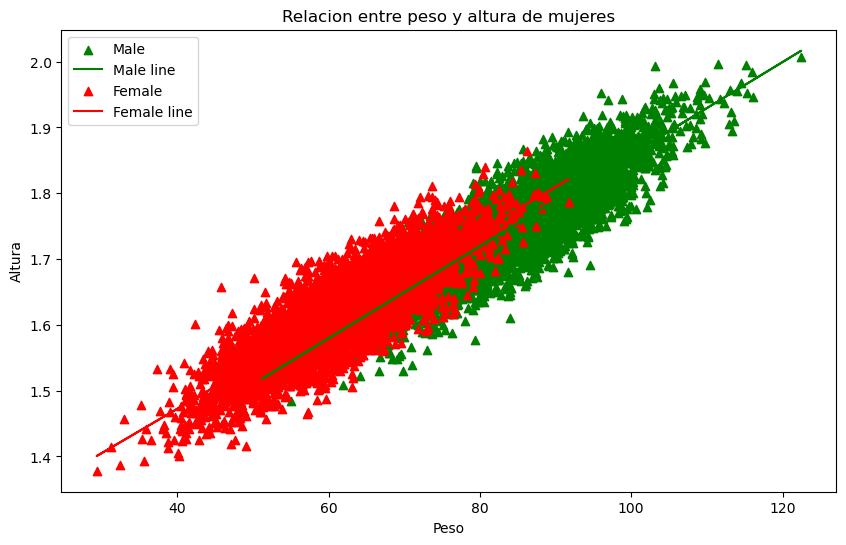

In [127]:
fig = plt.figure(figsize=(10,6))

y = df['Altura']
x = df['Peso']

colors = {'Male': 'green', 'Female':'red'}

for gender, color in colors.items():
    
    x = df[df['Genero'] == gender]['Peso']
    y = df[df['Genero'] == gender]['Altura']

    m, b = np.polyfit(x,y,1)
    
    plt.scatter(x,y, c=color,label=gender, marker='^')
    plt.plot(x,m*x+b, c=color, label=gender+' line')

plt.legend()
plt.title('Relacion entre peso y altura de mujeres')
plt.ylabel('Altura')
plt.xlabel('Peso')
plt.show()

# Otras librerias

## Pandas

In [129]:
df.head()

,Genero,Altura,Peso
0,Male,1.875714,109.720985
1,Male,1.747060,73.622732
2,Male,1.882397,96.497550
3,Male,1.821967,99.809504
4,Male,1.774998,93.598619


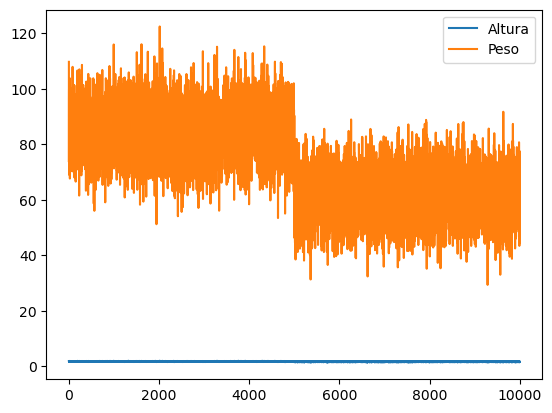

In [131]:
df.plot()
plt.show()

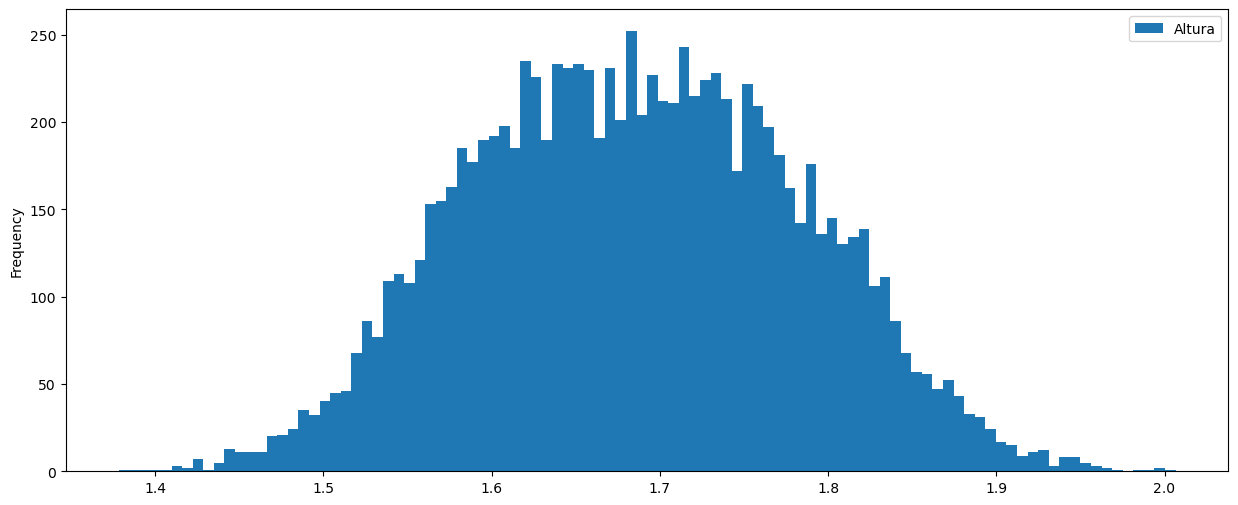

In [135]:
df.plot(kind='hist', y='Altura', bins=100, figsize=(15,6))
plt.show()

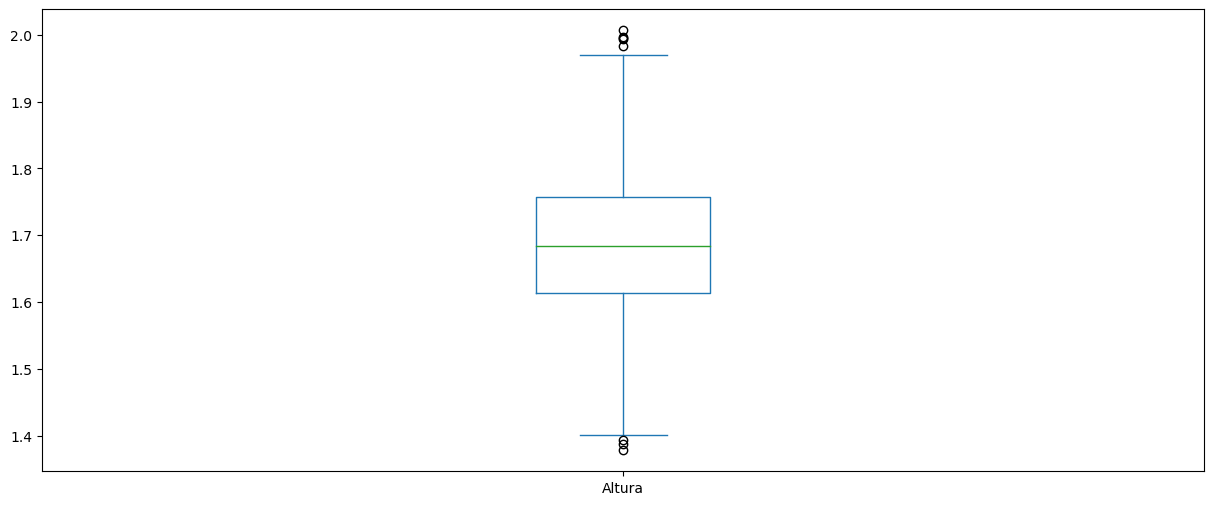

In [137]:
df.plot(kind='box', y='Altura',  figsize=(15,6))
plt.show()